# Polynomial Regression, Regularization with Lasso and Ridge Regression

<b>Goals</b>

- Polynomial, Lasso, and Ridge regression. How they work and how to use them.
- The concept of Regularization. Why it's used and how it relates to the external bias vs variance problem.

## Polynomial regression

So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

We're going to use polynomial terms (squares, cubes, etc..) on a regression equation for the purpose of fitting non-linear data, which is data cannot be fit using a least squares model.

![formula](http://www.statisticshowto.com/wp-content/uploads/2015/01/excel-polynomial-regression.png)




#### Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


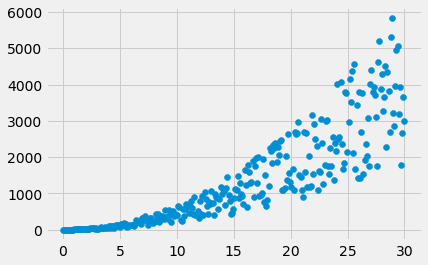

In [41]:
#Make random data to plot
#Input variable of 300 numbers from 0 to 30
X = np.linspace(0, 30, 300)
#Square x and assign it to y
y = X**2
#Throw in some randomness into y
y = y*(np.random.rand(300)*5 + 2)
#plt x and y
plt.style.use('fivethirtyeight')
plt.scatter(X, y);

In [42]:
X

array([ 0.        ,  0.10033445,  0.2006689 ,  0.30100334,  0.40133779,
        0.50167224,  0.60200669,  0.70234114,  0.80267559,  0.90301003,
        1.00334448,  1.10367893,  1.20401338,  1.30434783,  1.40468227,
        1.50501672,  1.60535117,  1.70568562,  1.80602007,  1.90635452,
        2.00668896,  2.10702341,  2.20735786,  2.30769231,  2.40802676,
        2.5083612 ,  2.60869565,  2.7090301 ,  2.80936455,  2.909699  ,
        3.01003344,  3.11036789,  3.21070234,  3.31103679,  3.41137124,
        3.51170569,  3.61204013,  3.71237458,  3.81270903,  3.91304348,
        4.01337793,  4.11371237,  4.21404682,  4.31438127,  4.41471572,
        4.51505017,  4.61538462,  4.71571906,  4.81605351,  4.91638796,
        5.01672241,  5.11705686,  5.2173913 ,  5.31772575,  5.4180602 ,
        5.51839465,  5.6187291 ,  5.71906355,  5.81939799,  5.91973244,
        6.02006689,  6.12040134,  6.22073579,  6.32107023,  6.42140468,
        6.52173913,  6.62207358,  6.72240803,  6.82274247,  6.92

In [35]:
X_df = pd.DataFrame(X)
X_df.head()

,0
0,0.000000
1,0.100334
2,0.200669
3,0.301003
4,0.401338


Our data is clearly non linear but let's go ahead fit a linear model on it.

In [43]:
X = X.reshape(-1, 1)

In [44]:
X

array([[ 0.        ],
       [ 0.10033445],
       [ 0.2006689 ],
       [ 0.30100334],
       [ 0.40133779],
       [ 0.50167224],
       [ 0.60200669],
       [ 0.70234114],
       [ 0.80267559],
       [ 0.90301003],
       [ 1.00334448],
       [ 1.10367893],
       [ 1.20401338],
       [ 1.30434783],
       [ 1.40468227],
       [ 1.50501672],
       [ 1.60535117],
       [ 1.70568562],
       [ 1.80602007],
       [ 1.90635452],
       [ 2.00668896],
       [ 2.10702341],
       [ 2.20735786],
       [ 2.30769231],
       [ 2.40802676],
       [ 2.5083612 ],
       [ 2.60869565],
       [ 2.7090301 ],
       [ 2.80936455],
       [ 2.909699  ],
       [ 3.01003344],
       [ 3.11036789],
       [ 3.21070234],
       [ 3.31103679],
       [ 3.41137124],
       [ 3.51170569],
       [ 3.61204013],
       [ 3.71237458],
       [ 3.81270903],
       [ 3.91304348],
       [ 4.01337793],
       [ 4.11371237],
       [ 4.21404682],
       [ 4.31438127],
       [ 4.41471572],
       [ 4

0.7614600703181528


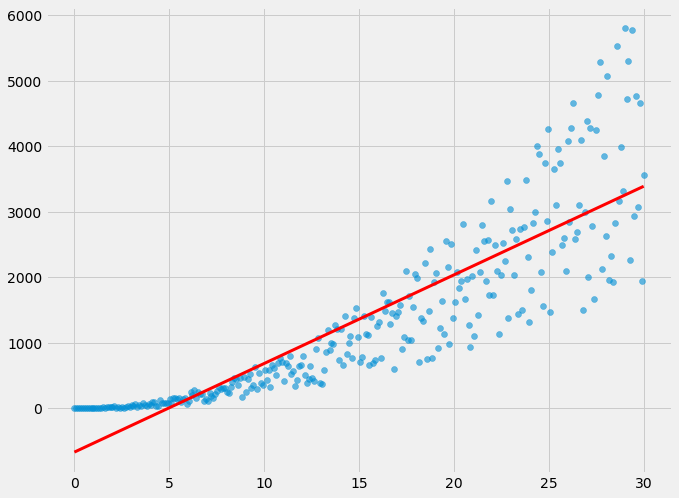

In [23]:
#Reshape X, turn it into a column
X = X.reshape(-1, 1)

#Intialize linear regression model
lr = LinearRegression()
#Fit model
lr.fit(X, y)

#Make predictions
preds = lr.predict(X)

#Print score
print (lr.score(X, y))
#plot data and predictions
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha = .6)
plt.plot(X, preds, linewidth = 3, color = "r");


How good is the fit?

Let's use polynomial regression to model this.

In [151]:
#explains ~77% of the variance in the data.

In [24]:
#Intialize Polynomial Features object, poly, with degree = 2

poly = PolynomialFeatures(degree = 2)

#fit and transform Polynomial object on data, set equal to X2
X2 = poly.fit_transform(X)

In [25]:
#X2 shape
X2.shape

(300, 3)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00334448e-01, 1.00670015e-02],
       [1.00000000e+00, 2.00668896e-01, 4.02680060e-02],
       [1.00000000e+00, 3.01003344e-01, 9.06030134e-02],
       [1.00000000e+00, 4.01337793e-01, 1.61072024e-01],
       [1.00000000e+00, 5.01672241e-01, 2.51675037e-01],
       [1.00000000e+00, 6.02006689e-01, 3.62412054e-01],
       [1.00000000e+00, 7.02341137e-01, 4.93283073e-01],
       [1.00000000e+00, 8.02675585e-01, 6.44288095e-01],
       [1.00000000e+00, 9.03010033e-01, 8.15427121e-01],
       [1.00000000e+00, 1.00334448e+00, 1.00670015e+00],
       [1.00000000e+00, 1.10367893e+00, 1.21810718e+00],
       [1.00000000e+00, 1.20401338e+00, 1.44964821e+00],
       [1.00000000e+00, 1.30434783e+00, 1.70132325e+00],
       [1.00000000e+00, 1.40468227e+00, 1.97313229e+00],
       [1.00000000e+00, 1.50501672e+00, 2.26507533e+00],
       [1.00000000e+00, 1.60535117e+00, 2.57715238e+00],
       [1.00000000e+00, 1.70568

In [154]:
#Look at first column. Adds a constant for us that's why we see the 1's...
X2[:, 0][:20]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [155]:
#Look at second column. The original data.
X2[:, 1][:20]

array([ 0.        ,  0.10033445,  0.2006689 ,  0.30100334,  0.40133779,
        0.50167224,  0.60200669,  0.70234114,  0.80267559,  0.90301003,
        1.00334448,  1.10367893,  1.20401338,  1.30434783,  1.40468227,
        1.50501672,  1.60535117,  1.70568562,  1.80602007,  1.90635452])

In [156]:
#Look at third column. The squares. 

In [157]:
X2[:, 2][:20]

array([ 0.        ,  0.010067  ,  0.04026801,  0.09060301,  0.16107202,
        0.25167504,  0.36241205,  0.49328307,  0.6442881 ,  0.81542712,
        1.00670015,  1.21810718,  1.44964821,  1.70132325,  1.97313229,
        2.26507533,  2.57715238,  2.90936343,  3.26170848,  3.63418754])

What do you see?

The first column is an intercept, the second is the original, and the third is the transformed column.

Now let's throw this into our model.

In [35]:
#Intialize model
lr = LinearRegression()

#fit model on X2 
lr.fit(X2, y)

#Make predictions
preds = lr.predict(X2)

#Score model
r2_score(y, preds)
#R^2 is improved. 

0.82154962338253668

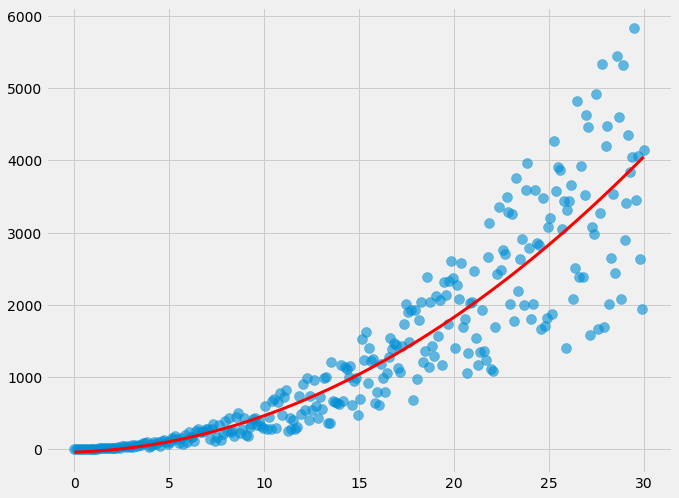

In [36]:
#Plot data and predictions

plt.figure(figsize=(10, 8))
#Plot the original X data versus
plt.scatter(X, y, s = 100, alpha= .6)
#Plot line plot of X and the new predictions
plt.plot(X, preds, linewidth = 3, color = "r");

Voila, here's our polynomial regression plot.

In [160]:
#There's more error when you go further along the x axis..

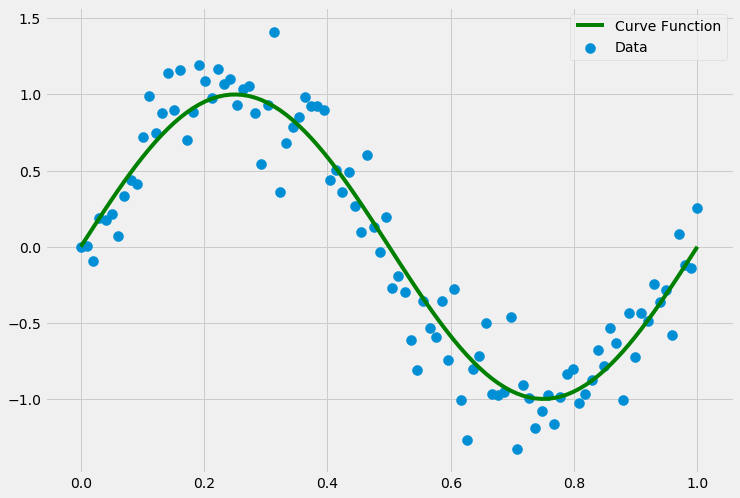

In [12]:

#Set random seeed
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# This returns 100 evenly spaced numbers from 0 to 1
X = np.linspace(0, 1, 100)

n_samples = 100

#Pass X into f and add random data to jitter data
y = f(X) + np.random.normal(scale = 0.2, size=n_samples)

#Make "predictions" set equal to curve
curve = f(X)

# Plot the training data against what we know to be the ground truth sin function
plt.figure(figsize=(11, 8))
plt.plot(X, curve, label = "Curve Function", color = "green")
plt.scatter(X, y, label = "Data", s = 100)
plt.legend()
plt.show();

### Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We'll combine the PolynomialFeatures function with the [make_pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

In [14]:

#Assign a variable pip to make_pipeline function that takes in Polynom and Linreg objects
#Specify degree = 3
pipe = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

#Reshape X
Xrs = X.reshape(-1, 1)
#fit pipe object on X and y
pipe.fit(Xrs, y)
#Make predictions
preds = pipe.predict(Xrs)

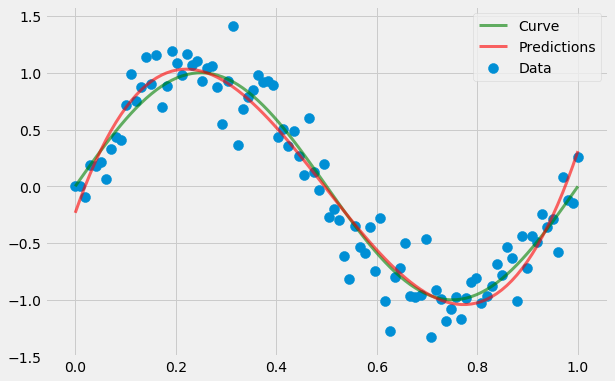

In [15]:
#Set size
plt.figure(figsize=(9, 6))
#Plot curve line
plt.plot(X, curve, label = "Curve", linewidth = 3, color = "green", alpha =.6)
#Scatter plot of data
plt.scatter(X, y, label = "Data", s = 100)
#Plot predictions from pipe
plt.plot(X, preds, label = "Predictions", linewidth = 3, color = "red", alpha =.6)
plt.legend()
plt.show()

What do you make of the fit?

The previous code in function form

In [16]:
def polynomial_ploting(X, y, degree):
    pipe = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    #Reshape X
    Xrs = X.reshape(-1, 1)
    #fit pipe object on X and y
    pipe.fit(Xrs, y)
    preds = pipe.predict(Xrs)
    print ("R2 score is", pipe.score(Xrs, y))
    plt.figure(figsize=(9, 6))
    #Plot curve line
    plt.plot(X, curve, label='Curve Line', linewidth = 3, color='green')
    #Scatter plot of data
    plt.scatter(X, y, label='data', s=100)
    #Plot predictions from pipe
    plt.plot(X, preds,label= "Predicted Line with {} degrees".format(degree),
             linewidth = 3, color= "red")
    plt.legend()
    plt.show();

('R2 score is', 0.5129732610726736)


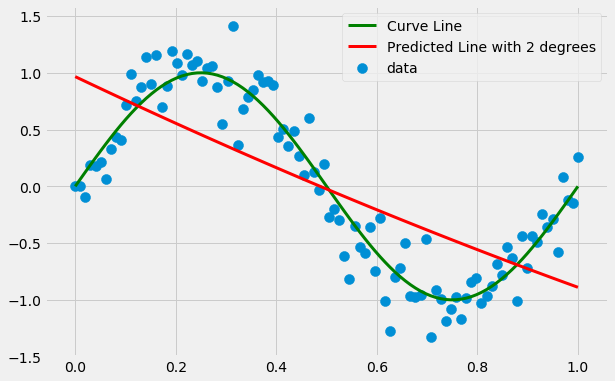

In [41]:
#Plot with 2 degrees
polynomial_ploting(Xrs, y, 2)

('R2 score is', 0.92860934462033506)


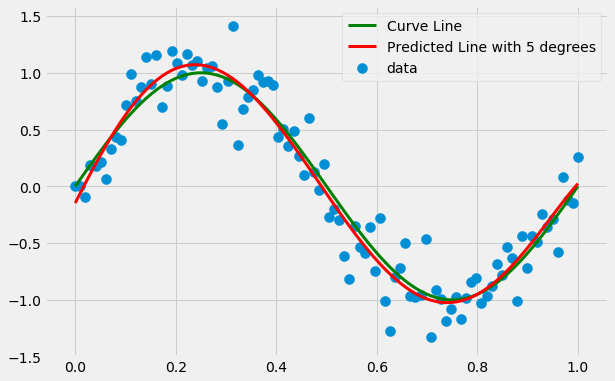

In [42]:
#Plot with 5 degrees
polynomial_ploting(Xrs, y, 5)

('R2 score is', 0.93900140984066205)


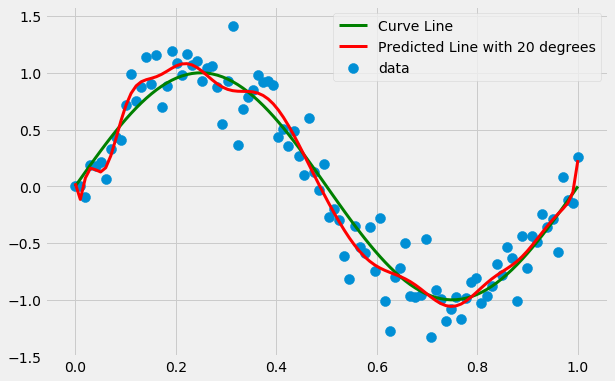

In [167]:
#Give me a value, TRYING TO OVERFIT!
polynomial_ploting(Xrs, y, 20)

('R2 score is', 0.94106560132756034)


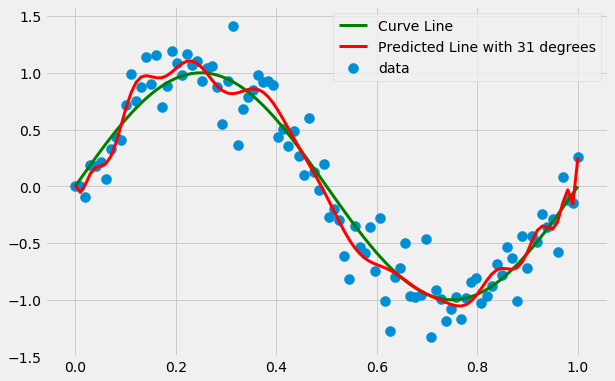

In [168]:
#Give me another one but higher
polynomial_ploting(Xrs, y, 31)

('R2 score is', 0.94907714057233306)


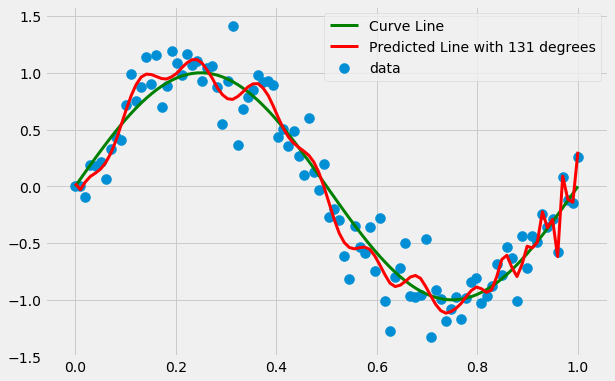

In [169]:
#One last one. PLAYING CONNECT THE DOTS!
polynomial_ploting(Xrs, y, 131)

### What do you notice happens when we increase our degrees?

In [170]:
#diminishing return with R^2 as we increase complexity or degree of the model.

In [171]:
#proceed with caution because it's easy to overfit, and cannot handle new data or testing data

As the polynomial degree increase so does the overfitting of the model.

![overfit](images/reg_overfit.png)


## Regularization

In simple terms it is the penalty on a model's complexity. Regularization helps prevent overfitting by penalizing large coefficients.

- If your model is very complex (i.e., lots of features, large features, high degree polynomial fit, etc.), you need to worry more about overfitting.
- Increasing model complexity leads multicolinearity because OLS-derived coefficients become increasingly large. This is a sign that the model is incorporating too much variance from the dataset aka <b>Overfitting</b>
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- Ridge and Lasso regression are two different regularization models.


![a](https://image.slidesharecdn.com/ch-4-demand-estimation2-110225045402-phpapp01/95/ch-4demandestimation2-11-728.jpg?cb=1298609672)

<b>Ridge</b>: It's function is the standard OLS function plus the squared value of each coefficient multipled by a constant/parameter (alpha) determined by you the data scientist. Similar to picking a K in a KNN model. 0 alpha equals OLS, very high alpha equals underfitting. Aka L2 regularization.
![ridge](images/ridge.png)

The alpha or $\lambda$ can take any value greater than 0. Best way to choose an optimal regularization parameter is with cross-validation.

<b>Lasso</b>: OLS function plus the sum of the absolute values of each coefficient. Has an advantage over Ridge because it's great for feature selection because it shrinks values of insignificant features to 0. Aka L1 regularization.
![e](images/lasso.png)

In [172]:
#Ridge is better for Multicollinearity. Lasso is better with showing insignificant features because they will be 0.
#take the better subset of features, and it should improve your model!

Ridge is better for dealing with multicollinearity and Lasso is better for high number of features.

In [45]:
#Load in boston dataset
import pandas as pd
from sklearn.datasets import load_boston
#Load boston data
boston = load_boston()
#Input it into a pandas dataframe
df = pd.DataFrame(boston["data"])
df.columns = boston["feature_names"]
df["MEDV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
#Look at the data dictionary
boston["DESCR"].split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [47]:
#Assign X and y

X = df.drop("MEDV", axis = 1)
y = df.MEDV

In [48]:
X.shape

(506, 13)

In [49]:
#Fit and score a linear regression model
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.7406077428649428

In [50]:
#Fit and score a ridge regression model with alpha = 0.4
ridge = Ridge(alpha=.4)
ridge.fit(X, y)
ridge.score(X, y)

0.740121036223513

In [51]:
#Fit and score a lasso regression model with alpha = 0.4
lasso = Lasso(alpha=.4)
lasso.fit(X, y)
lasso.score(X, y)

0.7177593845859311

In [179]:
# ridge and lasso will need an alpha, unlike Linear Regression models. 

Let's examine the best features using lasso regression

In [53]:
#Assign the lasso coefficients to coef variable.. Example ""coef_ , means it comes after a fitting of a certain object.
coef = lasso.coef_

In [59]:
#Zip column names and coef
dict(sorted(zip(coef, X.columns)), reverse = False)

{-0.9948506809590838: 'DIS',
 -0.76589371282211: 'PTRATIO',
 -0.6355593691180865: 'LSTAT',
 -0.08667007222960911: 'CRIM',
 -0.015343765711416385: 'TAX',
 -0.010953723591619854: 'INDUS',
 0.0: 'NOX',
 0.00025886304316726487: 'AGE',
 0.009769338223673077: 'B',
 0.04946645234503723: 'ZN',
 0.27840497965194844: 'RAD',
 2.7999886105190783: 'RM',
 'reverse': False}

What features are useless and useful?

In [182]:
#We don't care about the direction, we care about the degree or magnitude of coefs
#The best two is RM, RAD, and DIS
#CHAS is insignificant..
#The results are not interpretable for domain knowledge. Linear regression is interpretable per one unit increase

In [72]:
#Let's make a model to drop the insignificant features!

cols = ["AGE", "CHAS", "NOX", "TAX", "INDUS"]

XX = X.drop(cols, axis = 1)

In [73]:
lr = LinearRegression()
lr.fit(XX, y)

print("Linear Regression score is "), lr.score(XX, y)

ridge = Ridge(alpha= .4)
ridge.fit(XX, y)

print("Ridge Regression score is "), ridge.score(XX, y)

lasso = Lasso(alpha=.4)
lasso.fit(XX, y)

print("Lasso Regression score is "), lasso.score(XX, y)

Linear Regression score is  0.7106244236818251
Ridge Regression score is  0.7106239654676874
Lasso Regression score is  0.7045955309587546


In [185]:
#Lasso gave us the worst score. 

Class exercise: 
<br><br>
Part1: Test the linear, ridge, and lasso regression models on training and testing dataset.

Part2: Make validation plots for both Ridge and Lasso models in which you plot varying alpha values versus their cross-validated scores.

Part 1:

In [312]:
#Make train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [313]:
#Linear

lr = LinearRegression()
lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.748105199059
0.683955724318


In [314]:
#Ridge

ridge = Ridge(alpha=.4)
ridge.fit(X_train, y_train)
print ridge.score(X_train, y_train)
print ridge.score(X_test, y_test)

0.747503307324
0.681483028463


In [315]:
#Lasso

lasso = Lasso(alpha=.4)
lasso.fit(X_train, y_train)
print lasso.score(X_train, y_train)
print lasso.score(X_test, y_test)

0.727670184069
0.668005394516


Part 2:

In [318]:
#Alpha values for ridge model, similar to lin space, but on the log scale instead..
ridge_alphas = np.logspace(-4, 2.5, 50)

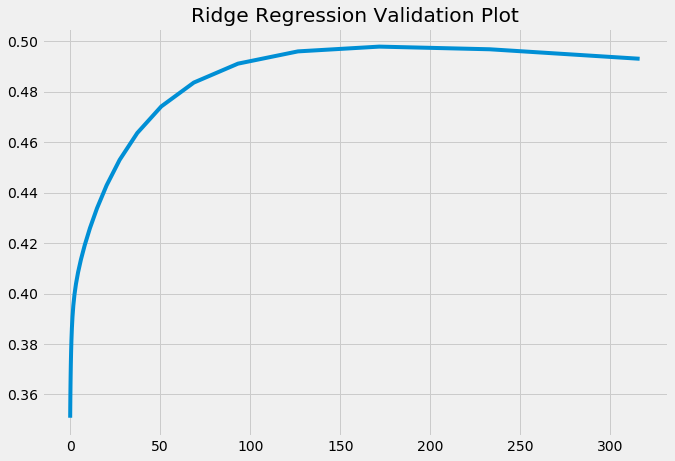

In [319]:
ridge_cv_scores = []

for alpha in ridge_alphas:
    cv_score = cross_val_score(Ridge(alpha= alpha), X, y, cv = 5).mean()
    ridge_cv_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.title("Ridge Regression Validation Plot")
plt.plot(ridge_alphas, ridge_cv_scores);

In [320]:
#Alpha values for lasso model
lasso_alphas = np.logspace(-4, 0, 50)

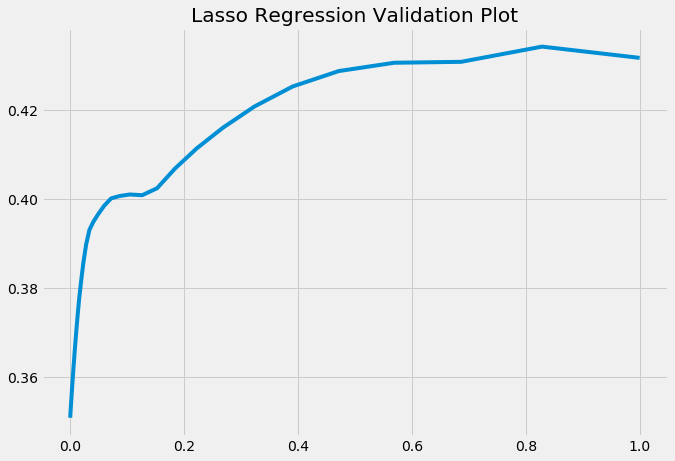

In [321]:
lasso_cv_scores = []

for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), X, y, cv = 5).mean()
    lasso_cv_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.title("Lasso Regression Validation Plot")
plt.plot(lasso_alphas, lasso_cv_scores);

## Regularized Polynomial Regression

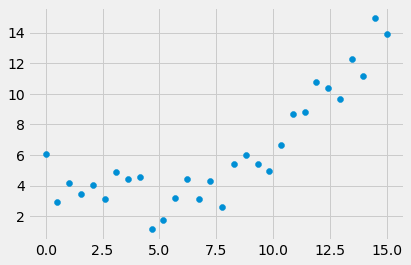

In [17]:
#Create random data and pass it into function
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))
N, n = 1000, 30
domain = np.linspace(0, 15, N)
x_sample = np.linspace(0, 15, n)
y_sample = func(x_sample)
#Plot random data
plt.scatter(x_sample, func(x_sample));

Use polynomial regression with varying degrees to model data.

In [20]:
x_sample.shape

(30,)

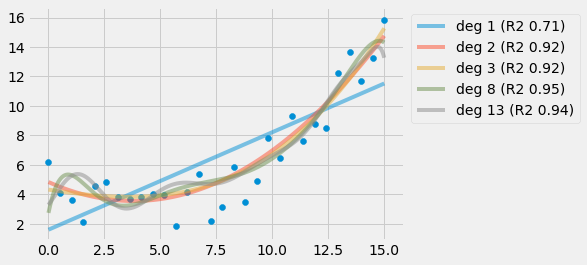

In [18]:
#Another way to reshape data
X = np.array([x_sample]).T
for degree in [1, 2, 3, 8, 13]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

plt.scatter(x_sample, func(x_sample))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show();

Cross validation time

('For degree', 1, ', R2 =', 0.50977238869005137)
('For degree', 2, ', R2 =', 0.68192737050121288)
('For degree', 3, ', R2 =', 0.76489339387990807)
('For degree', 4, ', R2 =', 0.58392811463219252)
('For degree', 5, ', R2 =', 0.66176711299765179)


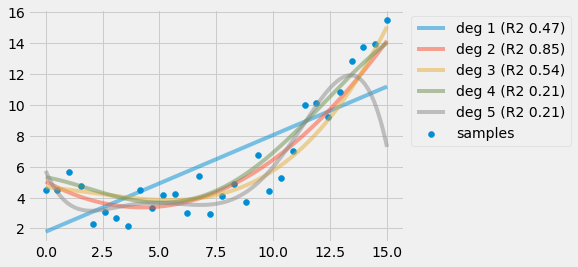

In [299]:
plt.scatter(x_sample, func(x_sample), label="samples")
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print ("For degree", degree, ", R2 =", np.mean(scores))
    # Take last model to plot predictions. T is a shortcut for Transpose
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Function for cross validating various polynomial values

In [300]:
def analyze_performance(test_model, X, y_sample):
    scores = {'overfit': {}, 'cv': {}}
    for degree in range(1, 20):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        cv_scores = []
        for k in range(5):  # Compute a few R2 scores and print average performance
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

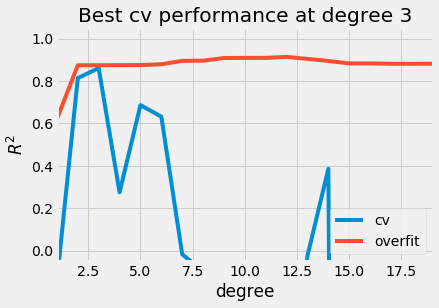

In [301]:
#Pass in empty linear regression and X and y_sample
scores = analyze_performance(LinearRegression(), X, y_sample)
scores.plot(ylim=(-.05,1.05))
plt.title("Best cv performance at degree %d" % scores.cv.argmax()), plt.xlabel('degree'), plt.ylabel('$R^2$');

In [199]:
#the best degree is at 4!
#negative R^2 shows how bad the model is at that degree level..

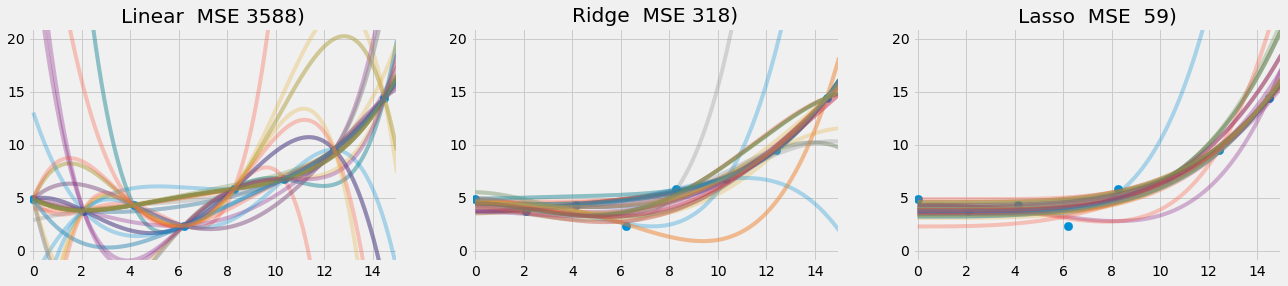

In [200]:
x_small_sample = x_sample[::4]
y_small_sample = func(x_small_sample)

degree, alpha = 4, 10

X = np.array([x_small_sample]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
m = ["Linear", "Ridge", "Lasso"]
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in range(40):  # Fit a few times the model to different training sets. 40 diff curves.
        X_train, X_test, y_train, y_test = train_test_split(X, y_small_sample, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([x_small_sample]).T)
        MSE.append(np.square(y_pred_sample - y_small_sample).sum())
    axes[no].scatter(x_small_sample, y_small_sample, s=70)
    axes[no].set_title("%s  MSE %3d)" % (m[no], np.mean(MSE)))
    axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)

![a](images/lin_ridge_lasso.png)

- The unregularized `LinearRegression` leads to a model that is too complex and tries to fit the noise. 
- Note the differences in the (averaged) mean square error, or MSE, as well the complexity in the plots

Let's incorpoate polynomial degrees a few degrees with the regularized models.

In [296]:
test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]

scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]

ValueError: Found input variables with inconsistent numbers of samples: [21613, 30]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, score in enumerate(scores):
    s, name = pd.DataFrame(score), test_models[no].__class__.__name__
    f = s.plot(ylim=(-.05,1.05), ax=axes[no], legend=False)
    f = axes[no].set_title("%s\nBest cv performance at degree %d" % (name, s.cv.argmax()))
    f = axes[no].set_xlabel('degree'), axes[no].set_ylabel('$R^2$')

In [ ]:
#Lasso is the most stable once we inspect which degree to use.. Just like KNN. 

Let's try a few different values for $\alpha$ as well.

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
test_models = test_models[1:]
for col, alpha in enumerate([0, 1, 10, 100]):
    scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]
    for row, score in enumerate(scores):
        s, name = pd.DataFrame(score), test_models[row].__class__.__name__
        f = s.plot(ylim=(-.05,1.05), ax=axes[row, col], legend=False)
        f = axes[row, col].set_title("%s (alpha %d)\nBest cv at degree %d" % (name, alpha, s.cv.argmax()))
        f = axes[row, col].set_xlabel('degree'), axes[row, col].set_ylabel('$R^2$')
plt.tight_layout()

In [ ]:
#looking at alpha and degree here. 


### Resources:

- https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/
- http://connor-johnson.com/2014/02/18/linear-regression-with-python/
- http://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
- https://www.youtube.com/watch?v=nmHNXsDPPFQ
- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
- http://setosa.io/ev/ordinary-least-squares-regression/
- https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
- http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture23_RidgeRegression_20172018.pdf

### Class work


For the rest of class, work on modeling the King County housing dataset using the models and techniques we've covered in this class. Find out if lasso and ridge regressions can give us a better model with this dataset.

In [260]:
kc = pd.read_csv("../data/kc_house_data.csv")

In [233]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [205]:
#Linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.697607319827
0.704868895236


In [206]:
#Ridge

ridge = Ridge(alpha= .4)
ridge.fit(X_train, y_train)
print ridge.score(X_train, y_train)
print ridge.score(X_test, y_test)

0.697606953178
0.704835897553


In [207]:
#Lasso

lasso = Lasso(alpha= .4)
lasso.fit(X_train, y_train)
print lasso.score(X_train, y_train)
print lasso.score(X_test, y_test)

0.697607319433
0.704867619439


In [208]:
#Assign the lasso coefficients to coef variable.. Example ""coef_ , means it comes after a fitting of a certain object.
coef = lasso.coef_

#Zip column names and coef
dict(zip(X.columns, coef))

{'bathrooms': 43865.781847229897,
 'bedrooms': -33977.616998032761,
 'condition': 23428.885819285049,
 'floors': 5644.907647939408,
 'grade': 94520.123771083629,
 'id': -1.426100057160664e-06,
 'lat': 595856.31188774365,
 'long': -193917.29608466022,
 'sqft_above': -100.56666071062925,
 'sqft_basement': -132.80387091473929,
 'sqft_living': 279.67299678798071,
 'sqft_living15': 20.231535788993927,
 'sqft_lot': 0.089971303675317513,
 'sqft_lot15': -0.36095675507683678,
 'view': 54804.733978718024,
 'waterfront': 554296.48581487639,
 'yr_built': -2646.5589151626846,
 'yr_renovated': 22.355663353134606,
 'zipcode': -551.47208331898685}

In [3]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#let's try DecisionTree as selected model

kc = pd.read_csv("../data/kc_house_data.csv")

#Drop features that are closest to zero. Insignificant features.
cols = ["price", "date", "sqft_lot15", "sqft_lot", "sqft_lot", "id", "yr_renovated"]

X = kc.drop(cols, axis = 1)
y = kc.price

In [5]:
from sklearn.tree import DecisionTreeClassifier

kc_model = DecisionTreeClassifier(max_depth = 25)
kc_model.fit(X, y);

In [6]:
kc_model.score(X, y)

0.90663026881969189

In [294]:
!pip install graphviz

In [ ]:
#imports
from sklearn.tree import export_graphviz
import graphviz

#Export the decision tree graph viz object. We have to export and then re-import it
export_graphviz(kc_model, out_file="kc.dot", 
                            feature_names=X.columns, 
                            class_names=y.unique())
with open("kc.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [210]:
lr = LinearRegression()
lr.fit(XX, y)

print("Linear Regression score is "), lr.score(XX, y)

ridge = Ridge(alpha= .4)
ridge.fit(XX, y)

print("Ridge Regression score is "), ridge.score(XX, y)

lasso = Lasso(alpha=.4)
lasso.fit(XX, y)

print("Lasso Regression score is "), lasso.score(XX, y)

Linear Regression score is  0.699047794794
Ridge Regression score is  0.698947266803
Lasso Regression score is  0.69894747453


In [74]:
#Alpha values for ridge model, similar to lin space, but on the log scale instead..
ridge_alphas = np.logspace(-4, 2.5, 50)

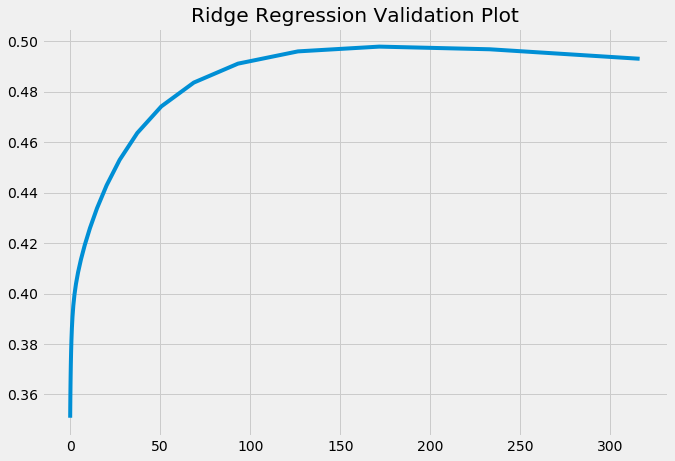

In [75]:
ridge_cv_scores = []

for i in ridge_alphas:
    cv_score = cross_val_score(Ridge(alpha=i), X, y, cv = 5).mean()
    ridge_cv_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.title("Ridge Regression Validation Plot")
plt.plot(ridge_alphas, ridge_cv_scores);

In [224]:
#Alpha values for lasso model
lasso_alphas = np.logspace(-4, 0, 50)

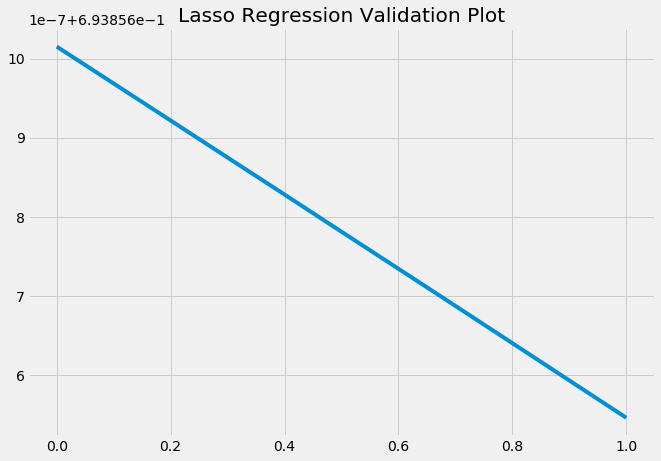

In [225]:
lasso_cv_scores = []

for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), X, y, cv = 5).mean()
    lasso_cv_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.title("Lasso Regression Validation Plot")
plt.plot(lasso_alphas, lasso_cv_scores);

In [211]:
def analyze_performance(test_model, X, y_sample):
    scores = {'overfit': {}, 'cv': {}}
    for degree in range(1, 20):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        cv_scores = []
        for k in range(5):  # Compute a few R2 scores and print average performance
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

In [213]:
#Pass in empty linear regression and X and y_sample
scores = analyze_performance(LinearRegression(), X, y_sample)
scores.plot(ylim=(-.05,1.05))
plt.title("Best cv performance at degree %d" % scores.cv.argmax()), plt.xlabel('degree'), plt.ylabel('$R^2$');

ValueError: Found input variables with inconsistent numbers of samples: [21613, 30]

In [ ]:
test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]

scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, score in enumerate(scores):
    s, name = pd.DataFrame(score), test_models[no].__class__.__name__
    f = s.plot(ylim=(-.05,1.05), ax=axes[no], legend=False)
    f = axes[no].set_title("%s\nBest cv performance at degree %d" % (name, s.cv.argmax()))
    f = axes[no].set_xlabel('degree'), axes[no].set_ylabel('$R^2$')